# Punto 1

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

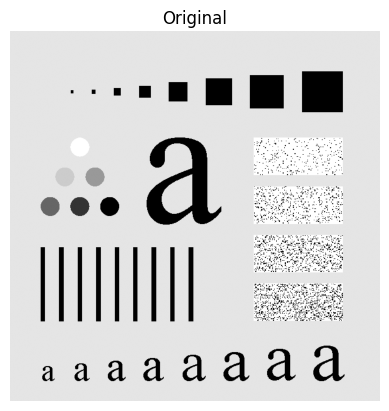

In [42]:
img = cv2.imread("Imagenes/Fig0448(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()

# Probamos la implementación de CV2, pero no se afectan los bordes

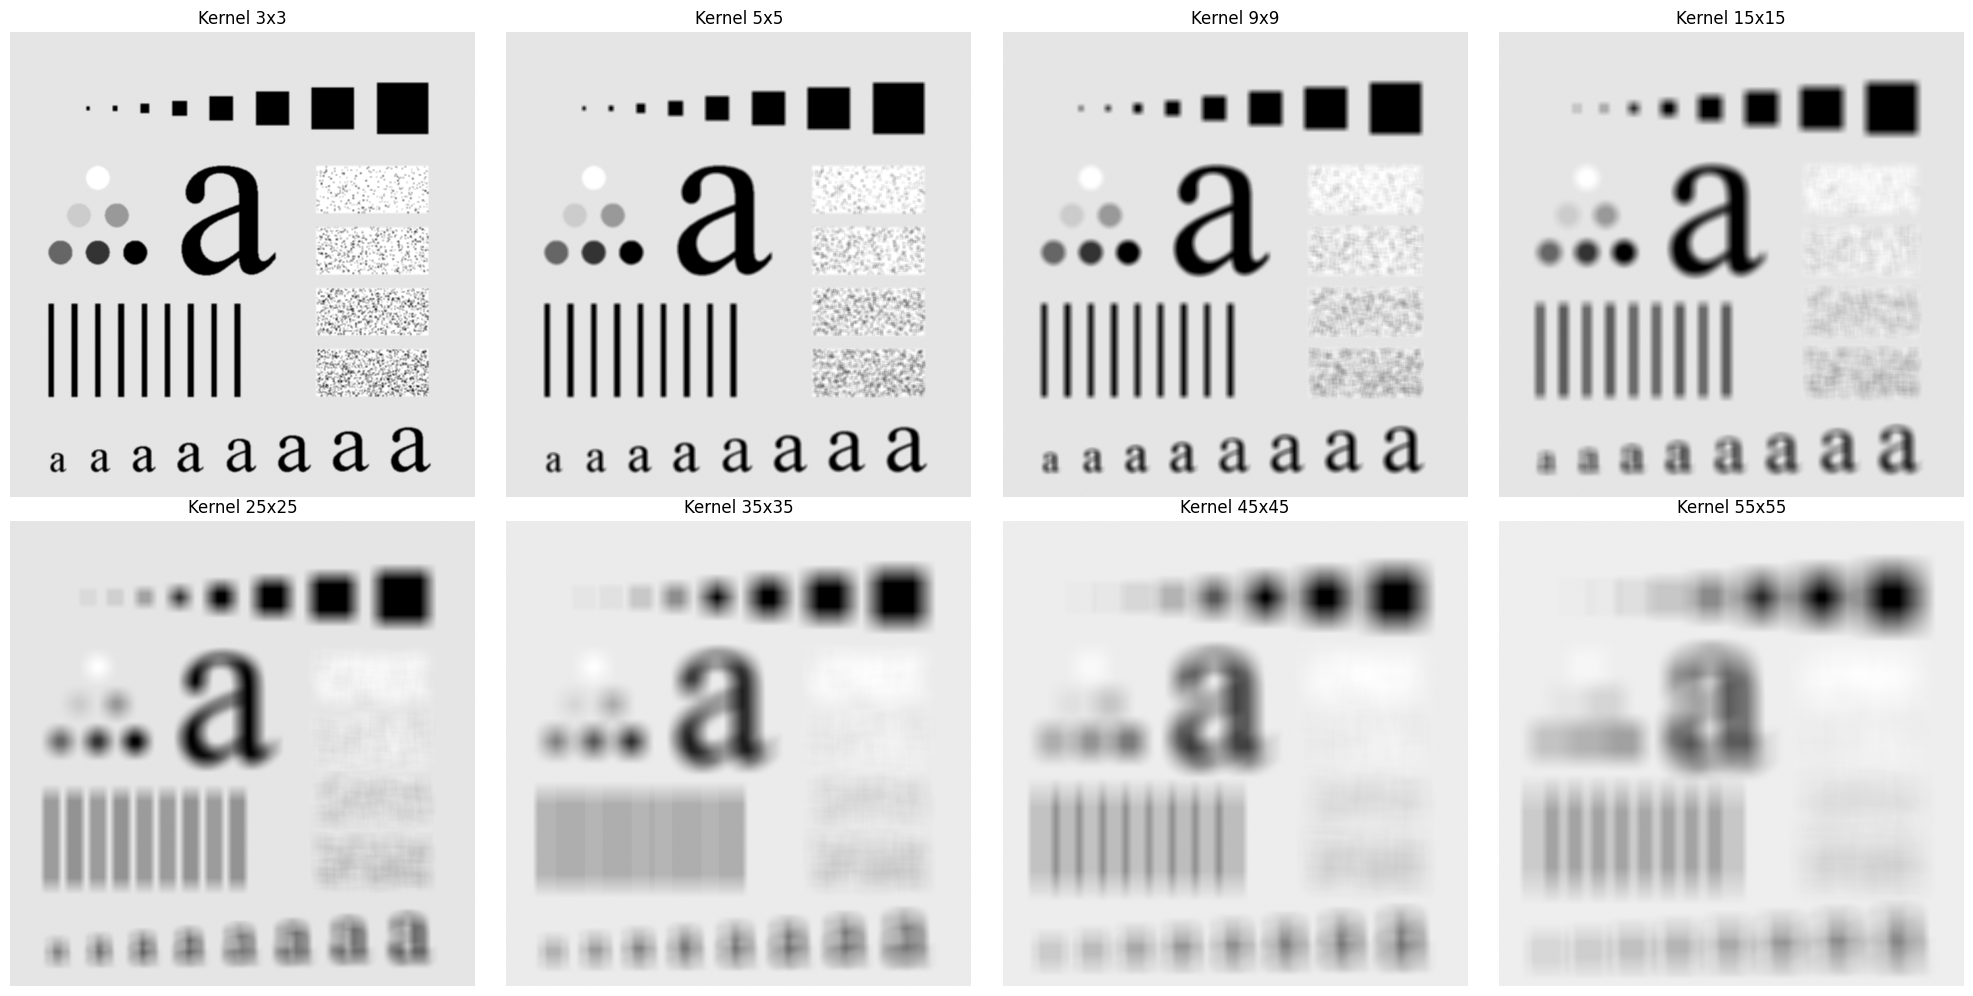

In [43]:
def create_kernel(dim):
    # Crea un kernel cuadrado de tamaño dim x dim donde cada celda tiene valor 1/(dim²)
    value = 1.0 / (dim * dim)
    kernel = np.full((dim, dim), value, dtype=np.float32)
    return kernel

n = [3,5,9,15,25,35,45,55]
filtered_imgs = []
for dim in n:
    kernel = create_kernel(dim)
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_imgs.append((dim, filtered))

# Mostrar todos los resultados
plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Nuestra implementación 

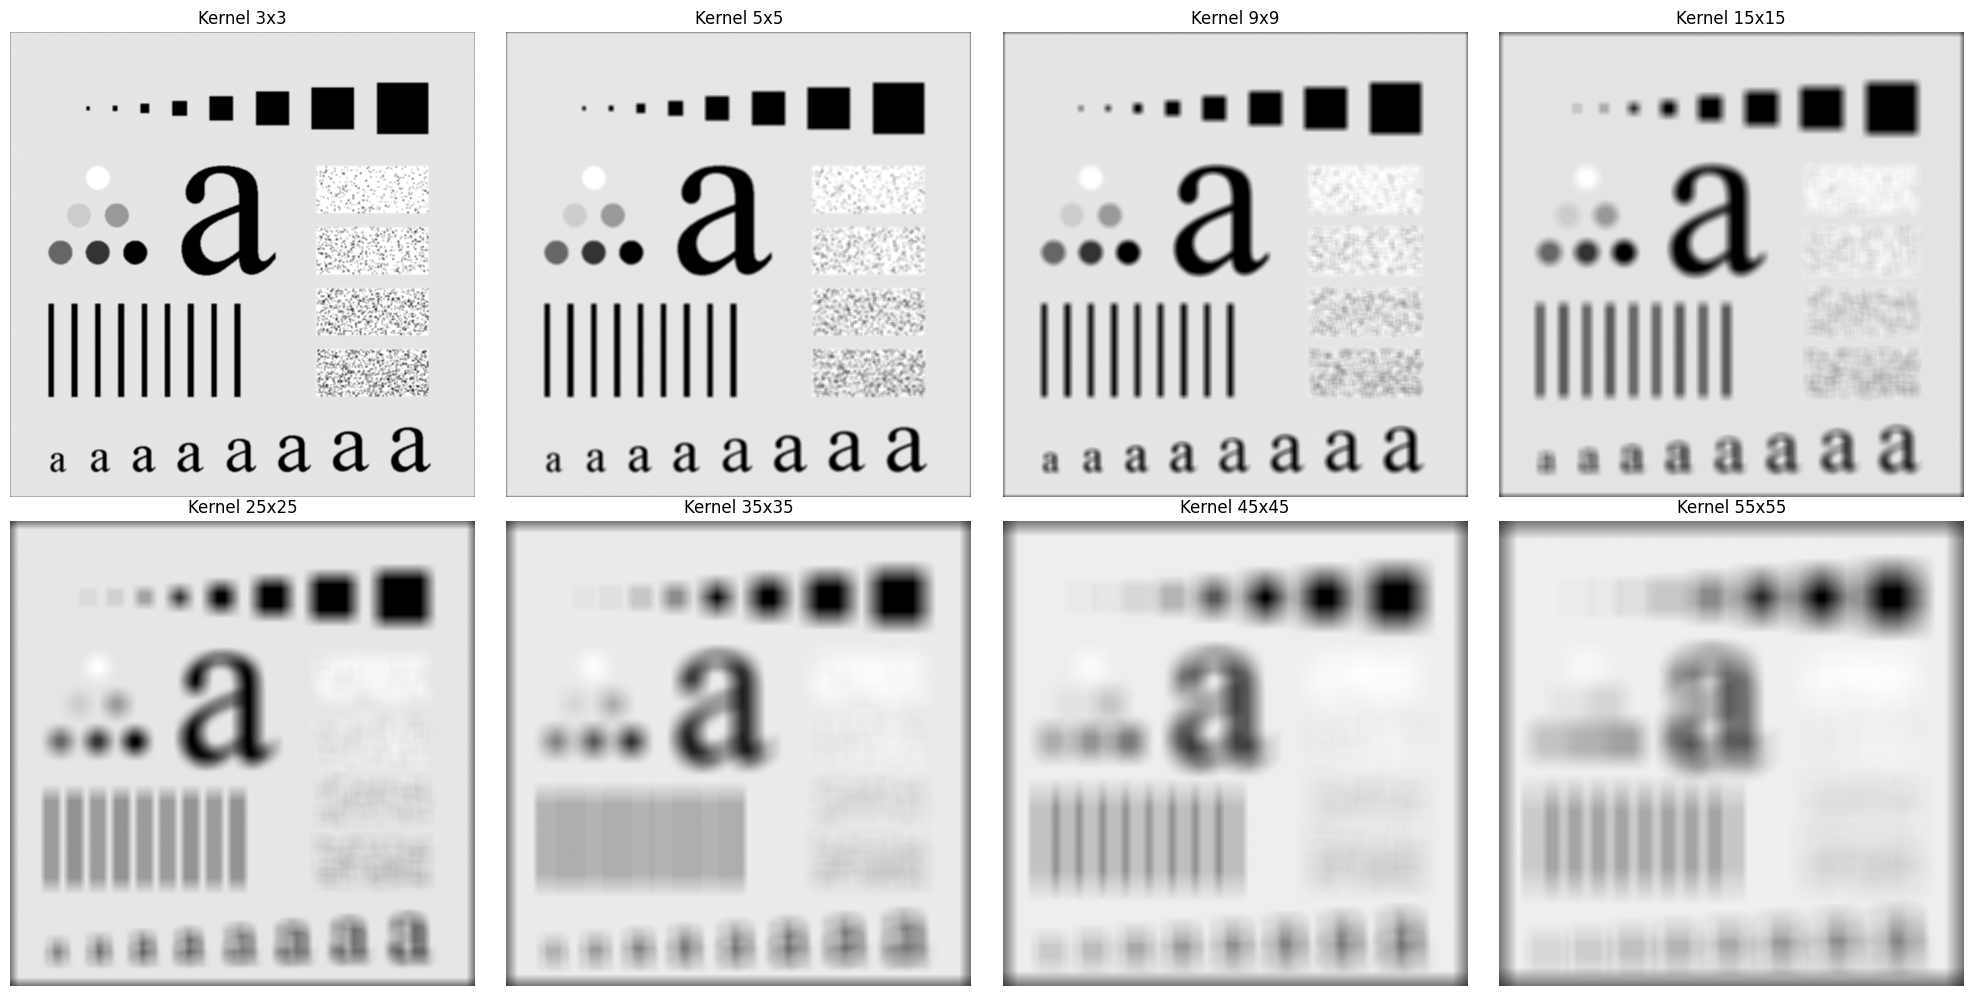

In [44]:
def manual_filter(img, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2
    # Padding para bordes
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            filtered[i, j] = np.sum(region * kernel)
    return filtered.astype(img.dtype)

filtered_imgs = []  # Reiniciar la lista antes de llenarla
for dim in n:
    kernel = create_kernel(dim)
    filtered = manual_filter(img, kernel)
    filtered_imgs.append((dim, filtered))

plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Punto 2

Alto: 1041, Ancho: 775


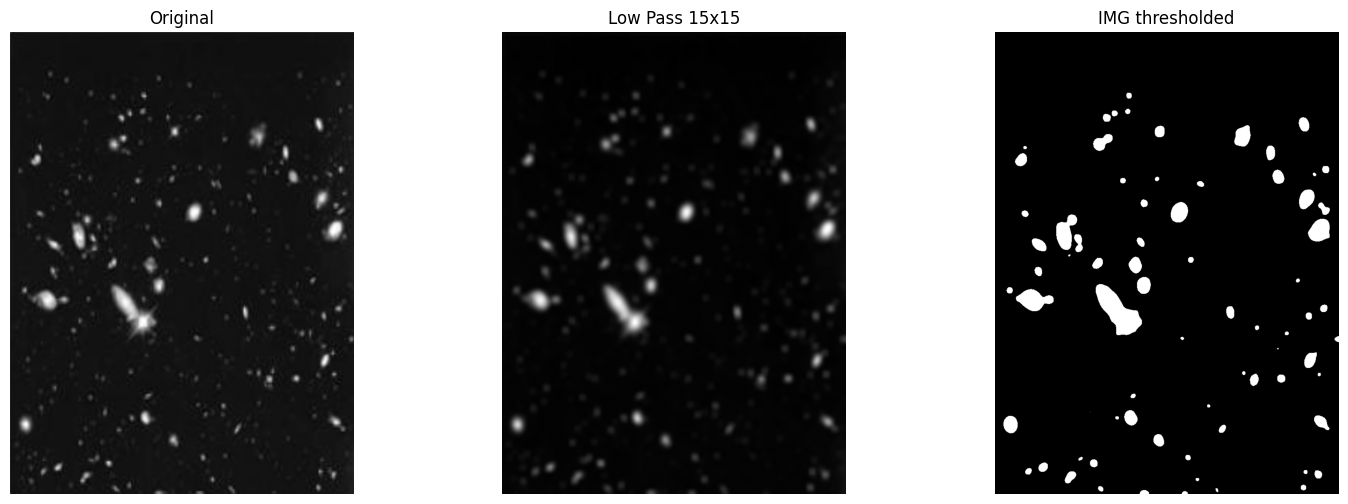

In [45]:
img = cv2.imread("Imagenes/stars.png", cv2.IMREAD_GRAYSCALE)

kernel = create_kernel(15)
filtered = cv2.filter2D(img, -1, kernel)

h, w = filtered.shape

filtered_copy = filtered.copy()

threshold = filtered_copy.max() * 0.25

print(f"Alto: {h}, Ancho: {w}")

for i in range(h):
    for j in range(w):
        if filtered_copy[i, j] < threshold:
            filtered_copy[i, j] = 0
        elif filtered_copy[i, j] >= threshold:
            filtered_copy[i, j] = 255
            
            
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered, cmap='gray')
plt.title('Low Pass 15x15')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_copy, cmap='gray')
plt.title('IMG thresholded')
plt.axis('off')

plt.show() 

# Punto 3

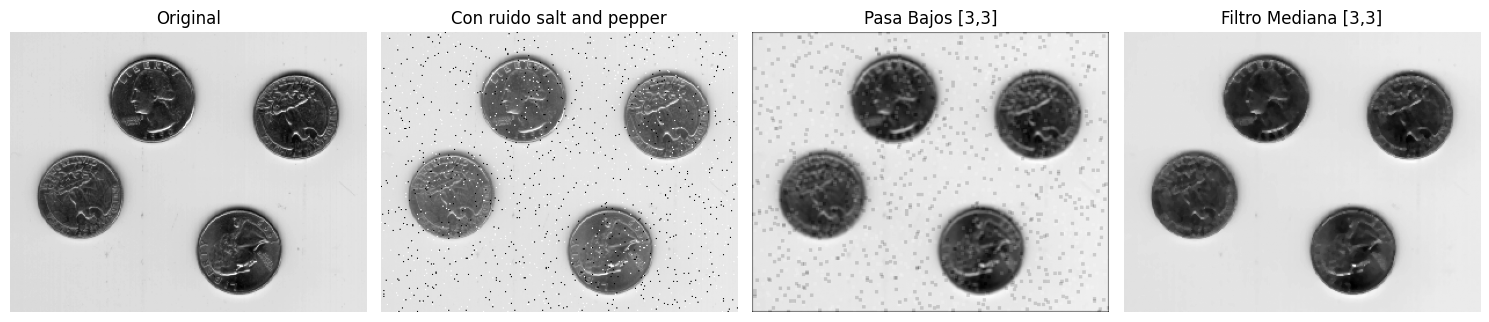

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread("Imagenes/eight.tif", cv2.IMREAD_GRAYSCALE)

# Parámetro: proporción de píxeles afectados por el ruido
amount = 0.02  # 5% de los píxeles
salt_vs_pepper = 0.5  # Proporción de sal y pimienta

# Crear copia de la imagen
noisy_img = img.copy()

# Número de píxeles a modificar
num_salt = np.ceil(amount * img.size * salt_vs_pepper).astype(int)
num_pepper = np.ceil(amount * img.size * (1.0 - salt_vs_pepper)).astype(int)

# Añadir sal (blanco)
coords = [np.random.randint(0, i, num_salt) for i in img.shape]
noisy_img[coords[0], coords[1]] = 255

# Añadir pimienta (negro)
coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
noisy_img[coords[0], coords[1]] = 0

kernel = create_kernel(3)

denoised_img = manual_filter(noisy_img, kernel)

median_filtered_img = cv2.medianBlur(noisy_img, 3)

# Mostrar imagen original y con ruido
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Con ruido salt and pepper')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(denoised_img, cmap='gray')
plt.title('Pasa Bajos [3,3]')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Filtro Mediana [3,3]')
plt.axis('off')

plt.tight_layout()
plt.show()

# Punto 4

Valor mínimo del laplaciano: -354.0
Valor máximo del laplaciano: 336.0


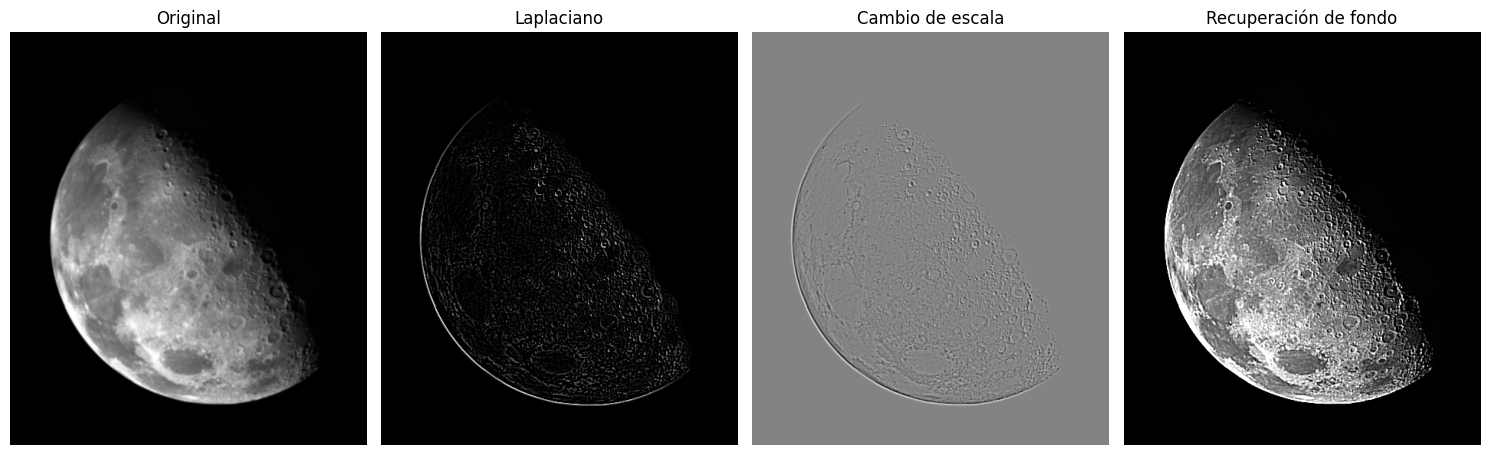

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread("Imagenes/blurry_moon.tif", cv2.IMREAD_GRAYSCALE)

# Aplicar filtro laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Convertir ambos arrays a int16 antes de restar
img_int16 = img.astype(np.int16)
laplacian_int16 = laplacian.astype(np.int16)
img_recuperada = cv2.subtract(img_int16, laplacian_int16)
img_recuperada = np.clip(img_recuperada, 0, 255).astype(np.uint8)

print(f"Valor mínimo del laplaciano: {laplacian.min()}")
print(f"Valor máximo del laplaciano: {laplacian.max()}")

# Mostrar resultados
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(laplacian, cmap='gray', vmin= 0, vmax=255)
plt.title('Laplaciano')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Cambio de escala')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_recuperada, cmap='gray')
plt.title('Recuperación de fondo')
plt.axis('off')

plt.tight_layout()
plt.show()

# Punto 5: Hi Boost

La idea es que al restar la imagen "borrosa" o "promediada" a la imagen original escalada por A>1, se obtenga una imagen que tenga menos componentes de baja frecuencia (estamos restando la imagen filtrada con un filtro pasa bajos), por lo que la imagen resultante debería resaltar más sus componentes de alta frecuencia.

Teniendo esto en cuenta, 

C:\Users\hertt\AppData\Local\Temp\ipykernel_36708\266347091.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


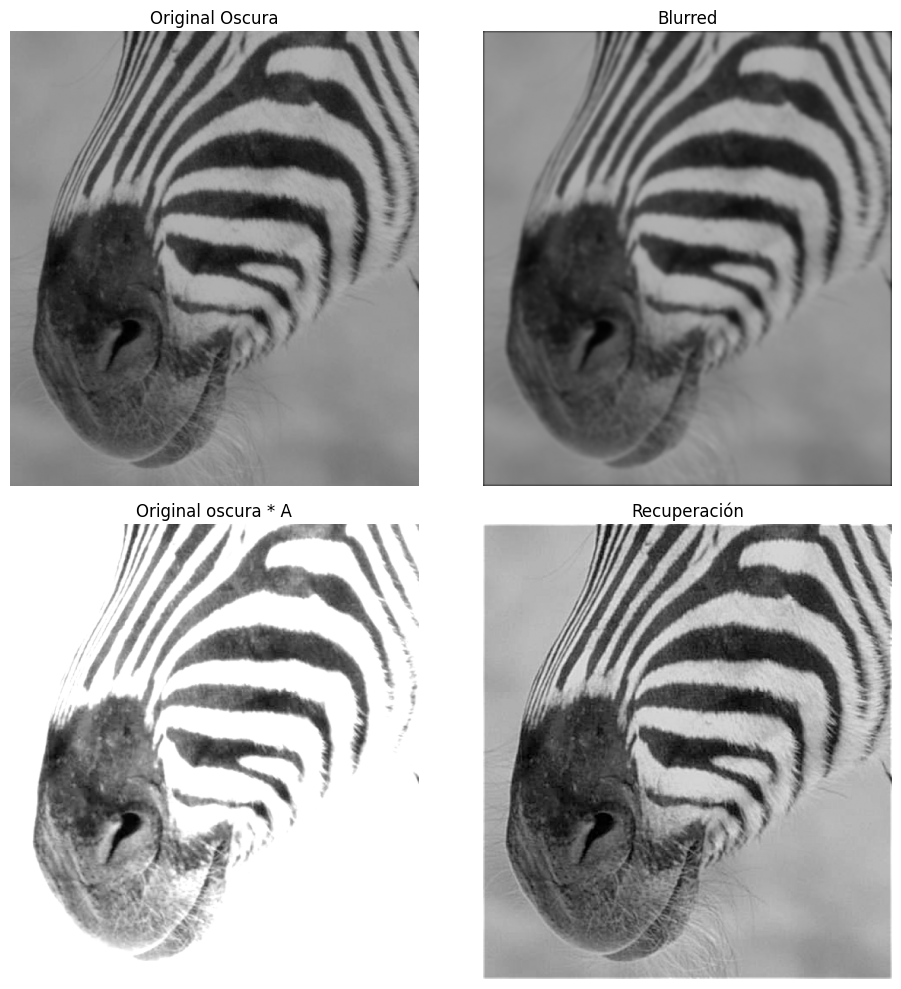

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

A=2.2

img = cv2.imread("Imagenes/zebra.png", cv2.IMREAD_GRAYSCALE)
img = img*0.7
kernel = create_kernel(7)
blurred = manual_filter(img, kernel)

scalated_img = A*img

recovered_img = cv2.subtract(scalated_img, blurred)

fig, axes = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
ims = [img, blurred, scalated_img, recovered_img]
titles = ['Original Oscura', 'Blurred', 'Original oscura * A', 'Recuperación']
for ax, im, title in zip(axes.flatten(), ims, titles):
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\hertt\AppData\Local\Temp\ipykernel_36708\1029109039.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


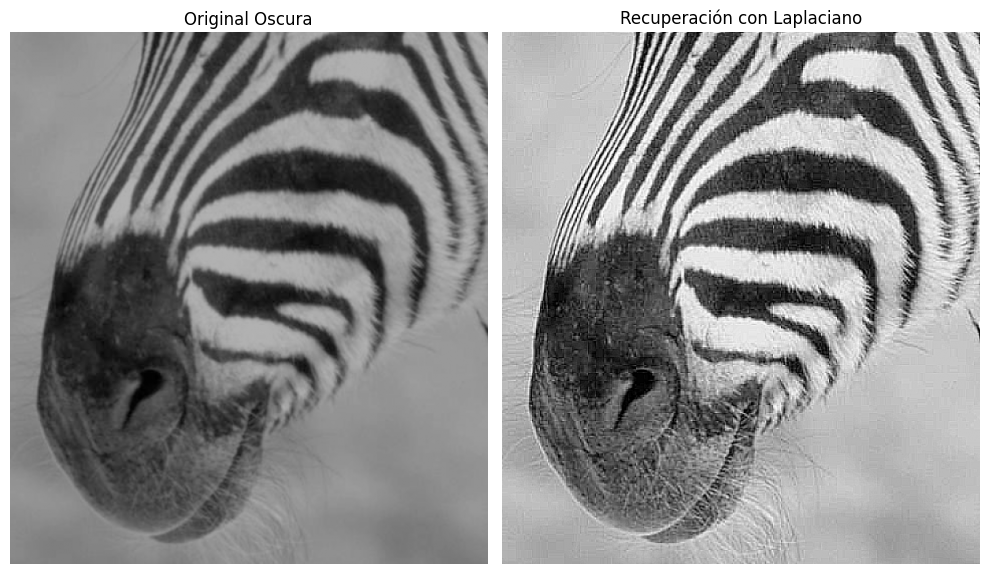

In [78]:
#esto puede hacerse con el laplaciano, ya que la idea es incrementar las componentes de alta
#frecuencia, y además escalar el brillo con A. De esta forma, se podría hacer:

img = cv2.imread("Imagenes/zebra.png", cv2.IMREAD_GRAYSCALE)
img = img*0.7
A = 2.3
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
scalated_img = (A-1)*img
recovered_img = cv2.subtract(scalated_img, laplacian)

fig, axes = plt.subplots(1, 2, figsize=(10,10), constrained_layout=True)
ims = [img, recovered_img]
titles = ['Original Oscura', 'Recuperación con Laplaciano']
for ax, im, title in zip(axes.flatten(), ims, titles):
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()